In [9]:
import numpy as np
import pandas as pd
import nltk as nlt
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
file_path = "../../data/processed/nvidia_grouped_preprocessed/posts_by_month.json"

with open(file_path, "r", encoding="utf-8") as file:
    json_data = json.load(file)

# Flatten into a single list of all posts
all_posts = []
for month, posts in json_data.items():
    all_posts.extend(posts)  # Combine all posts into one list

# Create DataFrame
df = pd.DataFrame(all_posts)


In [11]:
df.head()

,month,title,date,time,score,num_comments,flair,body,combined_text,comments
0,2025-04,game ready studio driver 57602 faqdiscussion,2025-04-16,17:47:13,568,2059,Discussion,game ready studio driver 57602 has been rele...,game ready studio driver 57602 faqdiscussion ...,[]
1,2025-04,tech support and question megathread april 20...,2025-04-01,10:45:43,6,29,Tech Support,were consolidating all tech support posts and ...,tech support and question megathread april 20...,[]
2,2025-04,5090 astral lc,2025-04-18,21:01:07,20,14,Build/Photos,astral 5090 lc installed today using hwmonito...,5090 astral lc astral 5090 lc installed today ...,[]
3,2025-04,dont mess up your 5090fe order like i did,2025-04-18,00:05:14,443,104,Discussion,after months of trying i finally got an order ...,dont mess up your 5090fe order like i did afte...,[]
4,2025-04,im considering to buy an rtx 4090,2025-04-18,21:22:01,8,38,Discussion,i have an rtx 3080 and i was considering buyin...,im considering to buy an rtx 4090 i have an rt...,[]


# Text Based Analysis

In [12]:
text = df["combined_text"]

In [13]:
from collections import Counter
import re

# Total character counts per post
character_count = list(map(lambda x:len(x),text))

df["character_count"] = character_count

# Total word count per post
word_counts = list(map(lambda s: len(s.split()), text))
df["Word_count"] = word_counts

# Seperated Words from total list
words = [word.lower() for t in text for word in re.findall(r'\b\w+\b', t)]
# df["Sepeated_words"] = words

# Sepeated words PER list
words_per_list = []
for t in text:
    words_per_list.append([text.lower() for text in re.findall(r'\b\w+\b', t)])

df["Seperated_List"] = words_per_list

# Frequncy of words in the entire dataframe
word_freq_counts = Counter(words)

In [14]:
# nlt.download('stopwords',download_dir="/src/EDA")
df.head()

,month,title,date,time,score,num_comments,flair,body,combined_text,comments,character_count,Word_count,Seperated_List
0,2025-04,game ready studio driver 57602 faqdiscussion,2025-04-16,17:47:13,568,2059,Discussion,game ready studio driver 57602 has been rele...,game ready studio driver 57602 faqdiscussion ...,[],9603,1570,"[game, ready, studio, driver, 57602, faqdiscus..."
1,2025-04,tech support and question megathread april 20...,2025-04-01,10:45:43,6,29,Tech Support,were consolidating all tech support posts and ...,tech support and question megathread april 20...,[],4162,683,"[tech, support, and, question, megathread, apr..."
2,2025-04,5090 astral lc,2025-04-18,21:01:07,20,14,Build/Photos,astral 5090 lc installed today using hwmonito...,5090 astral lc astral 5090 lc installed today ...,[],245,43,"[5090, astral, lc, astral, 5090, lc, installed..."
3,2025-04,dont mess up your 5090fe order like i did,2025-04-18,00:05:14,443,104,Discussion,after months of trying i finally got an order ...,dont mess up your 5090fe order like i did afte...,[],843,170,"[dont, mess, up, your, 5090fe, order, like, i,..."
4,2025-04,im considering to buy an rtx 4090,2025-04-18,21:22:01,8,38,Discussion,i have an rtx 3080 and i was considering buyin...,im considering to buy an rtx 4090 i have an rt...,[],409,87,"[im, considering, to, buy, an, rtx, 4090, i, h..."


In [15]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  # Load English stopwords
words = [w for w in words if w not in stop_words]
print(words)
word_freq_counts = Counter(words)
most_common = word_freq_counts.most_common(20)  

common_words_df = pd.DataFrame(most_common, columns=['Word', 'Frequency'])
common_words_df.head()

['game', 'ready', 'studio', 'driver', '57602', 'faqdiscussion', 'game', 'ready', 'studio', 'driver', '57602', 'released', 'two', 'pages', 'worth', 'fixes', 'cannot', 'find', 'driver', 'nvidia', 'website', 'search', 'showing', 'nvidia', 'app', 'please', 'give', 'time', 'propagate', 'article', 'link', 'game', 'ready', 'driver', 'direct', 'download', 'link', 'link', 'studio', 'driver', 'direct', 'download', 'link', 'link', 'new', 'feature', 'fixes', 'driver', '57602', 'game', 'ready', 'new', 'game', 'ready', 'driver', 'supports', 'new', 'geforce', 'rtx', '5060', 'ti', 'gpu', 'provides', 'best', 'gaming', 'experience', 'latest', 'new', 'games', 'supporting', 'dlss', '4', 'technology', 'including', 'black', 'myth', 'wukong', 'room', 'hell', '2', 'gaming', 'technology', 'adds', 'support', 'geforce', 'rtx', '5060', 'ti', 'applications', 'april', 'nvidia', 'studio', 'driver', 'offers', 'support', 'new', 'geforce', 'rtx', '5060', 'ti', 'well', 'latest', 'new', 'creative', 'applications', 'updat

[nltk_data] Downloading package stopwords to C:\Users\Bibidh
[nltk_data]     Subedi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Word,Frequency
0,rtx,116
1,gpu,107
2,get,85
3,nvidia,80
4,im,75


In [16]:
from nltk.util import ngrams

# Generate unigrams, bigrams, trigrams
unigrams = list(ngrams(words, 1))
bigrams = list(ngrams(words, 2))
trigrams = list(ngrams(words, 3))

# Count most common n-grams

grams_df = pd.DataFrame()
grams_df["bigrams"] = Counter(bigrams).most_common(20)
grams_df["trigrams"] = Counter(trigrams).most_common(20)
grams_df.head()


,bigrams,trigrams
0,"((50, series), 29)","((rtx, 50, series), 17)"
1,"((5060, ti), 23)","((inflation, cost, 2018), 10)"
2,"((5070, ti), 19)","((rtx, 5060, ti), 9)"
3,"((frame, generation), 18)","((nvidia, control, panel), 6)"
4,"((rtx, 50), 17)","((rtx, 5070, ti), 6)"


#### So bascailly, in addidtion to the relvent data from data frame, i also need to give 
#### Bigrams, trigrams, most coommon words

In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

sent = df['combined_text'].apply(lambda post: sia.polarity_scores(post)['compound'])
print(sent)

0      0.9586
1      0.9957
2      0.4372
3      0.9186
4      0.6310
        ...  
170    0.5754
171   -0.4767
172    0.0000
173   -0.7060
174   -0.9646
Name: combined_text, Length: 175, dtype: float64


In [18]:
df["Sentiment"] = sent

In [19]:
df.head()

,month,title,date,time,score,num_comments,flair,body,combined_text,comments,character_count,Word_count,Seperated_List,Sentiment
0,2025-04,game ready studio driver 57602 faqdiscussion,2025-04-16,17:47:13,568,2059,Discussion,game ready studio driver 57602 has been rele...,game ready studio driver 57602 faqdiscussion ...,[],9603,1570,"[game, ready, studio, driver, 57602, faqdiscus...",0.9586
1,2025-04,tech support and question megathread april 20...,2025-04-01,10:45:43,6,29,Tech Support,were consolidating all tech support posts and ...,tech support and question megathread april 20...,[],4162,683,"[tech, support, and, question, megathread, apr...",0.9957
2,2025-04,5090 astral lc,2025-04-18,21:01:07,20,14,Build/Photos,astral 5090 lc installed today using hwmonito...,5090 astral lc astral 5090 lc installed today ...,[],245,43,"[5090, astral, lc, astral, 5090, lc, installed...",0.4372
3,2025-04,dont mess up your 5090fe order like i did,2025-04-18,00:05:14,443,104,Discussion,after months of trying i finally got an order ...,dont mess up your 5090fe order like i did afte...,[],843,170,"[dont, mess, up, your, 5090fe, order, like, i,...",0.9186
4,2025-04,im considering to buy an rtx 4090,2025-04-18,21:22:01,8,38,Discussion,i have an rtx 3080 and i was considering buyin...,im considering to buy an rtx 4090 i have an rt...,[],409,87,"[im, considering, to, buy, an, rtx, 4090, i, h...",0.6310


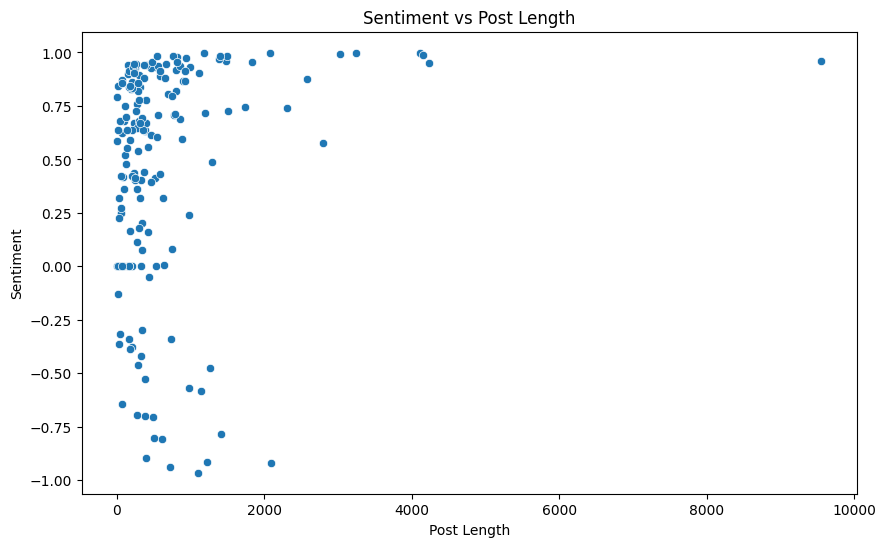

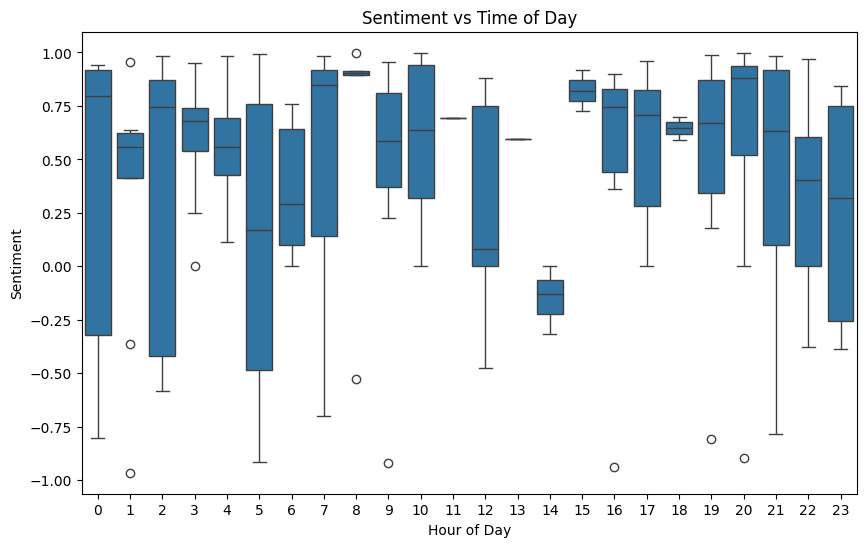

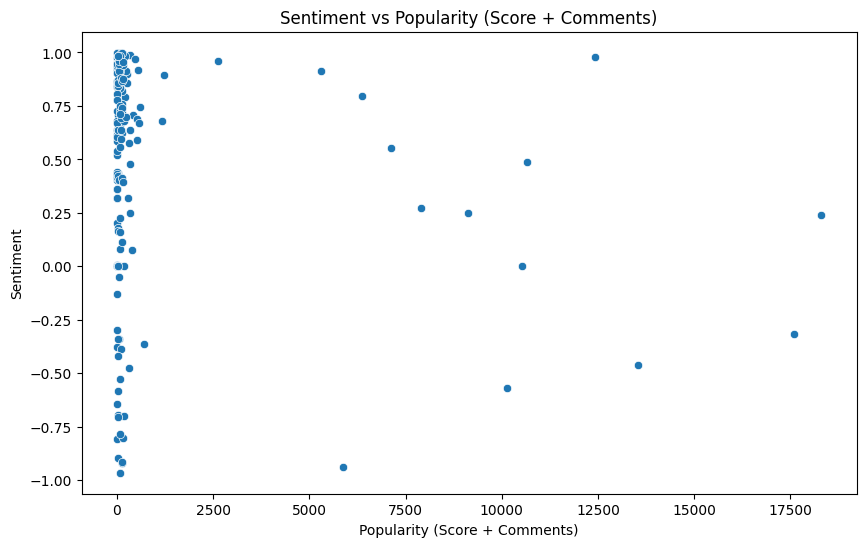

             post_length      hour  popularity  Sentiment
post_length     1.000000 -0.040705    0.013813   0.178360
hour           -0.040705  1.000000   -0.014596   0.031491
popularity      0.013813 -0.014596    1.000000  -0.149253
Sentiment       0.178360  0.031491   -0.149253   1.000000


In [20]:
###-------------------------------------------------------CHATGPT COPY PASTE HO I AINT TAKING NO ACCOUNTABILITY-----------------------------------------------------


# Assuming the DataFrame is already loaded as df
# # Create a new column for post length (character count in the 'body' column)
df['post_length'] = df['body'].apply(len)

# Extract hour from the 'time' column
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour

# Analyze sentiment vs post length
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='post_length', y='Sentiment')
plt.title('Sentiment vs Post Length')
plt.xlabel('Post Length')
plt.ylabel('Sentiment')
plt.show()

# Analyze sentiment vs time of day
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='hour', y='Sentiment')
plt.title('Sentiment vs Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Sentiment')
plt.show()

# Analyze sentiment vs popularity (score and num_comments)
df['popularity'] = df['score'] + df['num_comments']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='popularity', y='Sentiment')
plt.title('Sentiment vs Popularity (Score + Comments)')
plt.xlabel('Popularity (Score + Comments)')
plt.ylabel('Sentiment')
plt.show()

# Correlations (Post length, Time, Popularity with Sentiment)
correlations = df[['post_length', 'hour', 'popularity', 'Sentiment']].corr()
print(correlations)


In [21]:
relevant_columns = ['date', 'score', 'num_comments', 'flair','character_count','Word_count', 'Sentiment','post_length','hour', "popularity"]
new_df = df[relevant_columns]
new_df.head()

,date,score,num_comments,flair,character_count,Word_count,Sentiment,post_length,hour,popularity
0,2025-04-16,568,2059,Discussion,9603,1570,0.9586,9557,17,2627
1,2025-04-01,6,29,Tech Support,4162,683,0.9957,4105,10,35
2,2025-04-18,20,14,Build/Photos,245,43,0.4372,230,21,34
3,2025-04-18,443,104,Discussion,843,170,0.9186,801,0,547
4,2025-04-18,8,38,Discussion,409,87,0.6310,375,21,46


In [22]:
import os
import json

path = "../../data/PostEDA"
processed_dir = path
os.makedirs(processed_dir, exist_ok=True)

# Convert DataFrames to dictionaries or lists of dictionaries
with open(os.path.join(processed_dir, 'relevent_dataframe.json'), 'w') as f:
    json.dump(new_df.to_dict(orient='records'), f, indent=2)

with open(os.path.join(processed_dir, 'ngrams.json'), 'w') as f:
    json.dump(grams_df.to_dict(orient='records'), f, indent=2)

with open(os.path.join(processed_dir, 'most_common_words.json'), 'w') as f:
    json.dump(common_words_df.to_dict(orient='records'), f, indent=2)
